## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis - Anadolu Hayat Emeklilik Datathon (May 2022)</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("train-utf8.csv")

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Overview</p>

In [3]:
df.head()

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
0,7203428,10099,7,NEW,NEW,2014-04,PENSION318,STD BİREYSEL,Kanal7,ESKİŞEHİR,1964,2,TR,1,SEKT032,OCCU011,102.000,NaN,Single,Lisans,2500,2.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,15248.750,25684.250,0
1,2857821,10100,7,NEW,NEW,2016-09,PENSION419,KATILIM STD BİREYSEL,Kanal4 + Kanal2,BALIKESİR,1966,1,TR,1,NaN,NaN,103.000,NaN,Married,NaN,0,0.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,5842.710,10104.560,0
2,7833031,10042,1,NEW,NEW,2016-07,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKESİR,1956,2,TR,1,NaN,NaN,106.000,NaN,Married,NaN,0,0.000,280,280.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,3782.860,7060.940,0
3,4474944,10056,7,NEW,NEW,2014-09,PENSION434,KATILIM GRUP,Kanal4 + Kanal2,SAMSUN,1977,2,TR,1,SEKT032,OCCU039,102.000,NaN,Married,Lisans,2500,0.000,130,130.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,6855.030,12645.250,0
4,4660085,10068,7,NEW,NEW,2008-04,PENSION100,STD GRUP,Kanal4 + Kanal2,İSTANBUL,1962,2,TR,1,SEKT010,OCCU059,102.000,NaN,Married,Lisans,5000,0.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,27837.750,31613.070,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634112 entries, 0 to 634111
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POLICY_ID               634112 non-null  int64  
 1   OFFICE_ID               634112 non-null  int64  
 2   SIGORTA_TIP             634112 non-null  int64  
 3   SOZLESME_KOKENI         634112 non-null  object 
 4   SOZLESME_KOKENI_DETAY   627896 non-null  object 
 5   BASLANGIC_TARIHI        634112 non-null  object 
 6   KAPSAM_TIPI             634112 non-null  object 
 7   KAPSAM_GRUBU            634112 non-null  object 
 8   DAGITIM_KANALI          634106 non-null  object 
 9   POLICE_SEHIR            632176 non-null  object 
 10  DOGUM_TARIHI            634112 non-null  int64  
 11  CINSIYET                634112 non-null  int64  
 12  UYRUK                   634001 non-null  object 
 13  MEMLEKET                634112 non-null  int64  
 14  MESLEK              

In [5]:
df.isnull().sum()

POLICY_ID                      0
OFFICE_ID                      0
SIGORTA_TIP                    0
SOZLESME_KOKENI                0
SOZLESME_KOKENI_DETAY       6216
BASLANGIC_TARIHI               0
KAPSAM_TIPI                    0
KAPSAM_GRUBU                   0
DAGITIM_KANALI                 6
POLICE_SEHIR                1936
DOGUM_TARIHI                   0
CINSIYET                       0
UYRUK                        111
MEMLEKET                       0
MESLEK                     66860
MESLEK_KIRILIM             69138
MUSTERI_SEGMENTI               3
YATIRIM_KARAKTERI         558253
MEDENI_HAL                  3199
EGITIM_DURUM              149795
GELIR                      77644
COCUK_SAYISI              118108
OCAK_ODENEN_TUTAR              0
OCAK_VADE_TUTARI               0
SUBAT_ODENEN_TU                0
SUBAT_VADE_TUTARI              0
MART_ODENEN_TUTAR              0
MART_VADE_TUTARI               0
NISAN_ODENEN_TUTAR             0
NISAN_VADE_TUTARI              0
MAYIS_ODEN

In [6]:
df.isnull().sum() / df.shape[0] * 100

POLICY_ID                 0.000
OFFICE_ID                 0.000
SIGORTA_TIP               0.000
SOZLESME_KOKENI           0.000
SOZLESME_KOKENI_DETAY     0.980
BASLANGIC_TARIHI          0.000
KAPSAM_TIPI               0.000
KAPSAM_GRUBU              0.000
DAGITIM_KANALI            0.001
POLICE_SEHIR              0.305
DOGUM_TARIHI              0.000
CINSIYET                  0.000
UYRUK                     0.018
MEMLEKET                  0.000
MESLEK                   10.544
MESLEK_KIRILIM           10.903
MUSTERI_SEGMENTI          0.000
YATIRIM_KARAKTERI        88.037
MEDENI_HAL                0.504
EGITIM_DURUM             23.623
GELIR                    12.245
COCUK_SAYISI             18.626
OCAK_ODENEN_TUTAR         0.000
OCAK_VADE_TUTARI          0.000
SUBAT_ODENEN_TU           0.000
SUBAT_VADE_TUTARI         0.000
MART_ODENEN_TUTAR         0.000
MART_VADE_TUTARI          0.000
NISAN_ODENEN_TUTAR        0.000
NISAN_VADE_TUTARI         0.000
MAYIS_ODENEN_TUTAR        0.000
MAYIS_VA

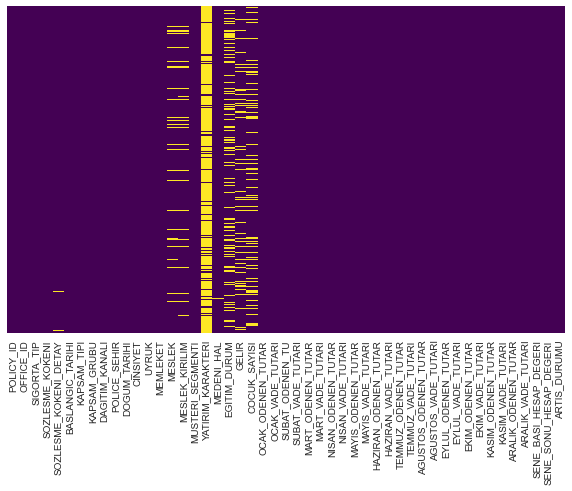

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
POLICY_ID,634112.000,5494077.698,2591409.363,1000050.000,3247899.250,5497920.000,7739649.750,9989995.000
OFFICE_ID,634112.000,10331.389,394.587,10000.000,10006.000,10152.000,10556.000,11756.000
SIGORTA_TIP,634112.000,2.537,2.600,1.000,1.000,1.000,6.000,8.000
DOGUM_TARIHI,634112.000,1977.636,11.090,1921.000,1970.000,1978.000,1986.000,2004.000
CINSIYET,634112.000,1.513,0.500,1.000,1.000,2.000,2.000,2.000
MEMLEKET,634112.000,1.007,0.106,1.000,1.000,1.000,1.000,3.000
MUSTERI_SEGMENTI,634109.000,104.382,1.521,101.000,103.000,105.000,106.000,106.000
COCUK_SAYISI,516004.000,0.104,0.476,0.000,0.000,0.000,0.000,20.000
OCAK_ODENEN_TUTAR,634112.000,204.457,341.239,0.000,0.000,160.000,270.000,20000.000
OCAK_VADE_TUTARI,634112.000,314.881,524.090,17.000,170.000,228.000,340.000,300000.000


In [89]:
df.describe(include="O").T

,count,unique,top,freq
SOZLESME_KOKENI,634112,5,NEW,620214
SOZLESME_KOKENI_DETAY,627896,10,NEW,612898
BASLANGIC_TARIHI,634112,195,2019-12,11509
KAPSAM_TIPI,634112,239,PENSION247,66416
KAPSAM_GRUBU,634112,10,GRUPLANMAMIŞ,359968
DAGITIM_KANALI,634106,20,Kanal4 + Kanal2,456132
POLICE_SEHIR,632176,603,İSTANBUL,144353
UYRUK,634001,80,TR,630849
MESLEK,567252,32,SEKT032,309717
MESLEK_KIRILIM,564974,87,OCCU074,113354


In [90]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['SOZLESME_KOKENI', 'SOZLESME_KOKENI_DETAY', 'BASLANGIC_TARIHI',
       'KAPSAM_TIPI', 'KAPSAM_GRUBU', 'DAGITIM_KANALI', 'POLICE_SEHIR',
       'UYRUK', 'MESLEK', 'MESLEK_KIRILIM', 'YATIRIM_KARAKTERI', 'MEDENI_HAL',
       'EGITIM_DURUM', 'GELIR'],
      dtype='object')

In [91]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

SOZLESME_KOKENI
----------------
NEW         620214
TRANS_C      12373
TRANS_L        808
TRANS_TF       716
TRANS            1
Name: SOZLESME_KOKENI, dtype: int64
----------------------------------------
SOZLESME_KOKENI_DETAY
----------------
NEW          612898
TRANS         10740
NaN            6216
TRANS_TR       2253
NEW_MRG        1625
INV_PROC        299
TRANS_MRG        48
NEW_TR           17
TRANS_T2         10
TR_T2_TR          5
TRANS_C           1
Name: SOZLESME_KOKENI_DETAY, dtype: int64
----------------------------------------
BASLANGIC_TARIHI
----------------
2019-12    11509
2015-12     9840
2015-07     8017
2015-06     7656
2016-01     7619
           ...  
2004-01      205
2004-04      203
2004-02      173
2003-11       87
2003-10       14
Name: BASLANGIC_TARIHI, Length: 195, dtype: int64
----------------------------------------
KAPSAM_TIPI
----------------
PENSION247    66416
PENSION215    57983
PENSION251    52236
PENSION001    46419
PENSION059    45527
            

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Detailed Examination of Data Column by Column</p>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">SIGORTA_TIP</p>

**SIGORTA_TIP**: Ürünlerin tipini verir:

    1: Ferdi BES
    4: Vasa Ferdi BES : Vakıf Sandık Bireysel Emeklilik Sistemi
    6: IGES : İşveren Grup Emeklilik Sistemi
    7: GBBES : Gruba Bağlı Bireysel Emeklilik Sistemi
    8: OKS : Otomatik Katılım Sistemi

In [8]:
df.SIGORTA_TIP.value_counts()

1    469399
7    150678
6     12415
8       873
4       747
Name: SIGORTA_TIP, dtype: int64

In [9]:
df.SIGORTA_TIP.isnull().sum()

0

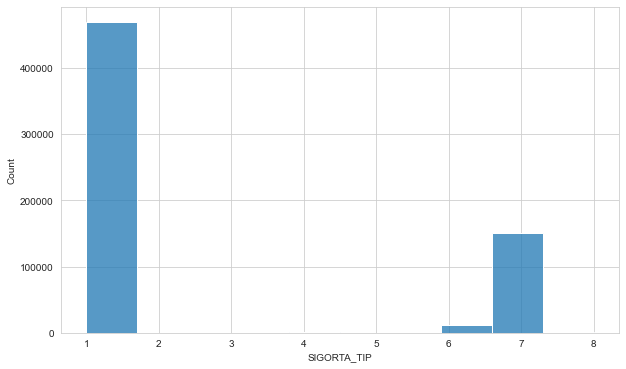

In [92]:
sns.histplot(x="SIGORTA_TIP", data=df, kde=False, bins=10);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">SOZLESME_KOKENI</p>

**SOZLESME_KOKENI**: Sözleşmenin yeni sözleşme mi yoksa aktarım yapılmış sözleşme mi olduğu bilgisini verir.

    NEW: Yeni Sözleşme
    TRANS_L: Hayat poliçesinden aktarım.
    TRANS_C: Başka şirketten aktarım.
    TRANS : Kullanıcı tarafından hatalı giriş olan kayıtlar, TRANS değerini TRANS_C olarak düşünebilirsiniz.
    TRANS_TF: Güven fonundan aktarım.

In [11]:
df.SOZLESME_KOKENI.value_counts()

NEW         620214
TRANS_C      12373
TRANS_L        808
TRANS_TF       716
TRANS            1
Name: SOZLESME_KOKENI, dtype: int64

In [12]:
df.SOZLESME_KOKENI.isnull().sum()

0

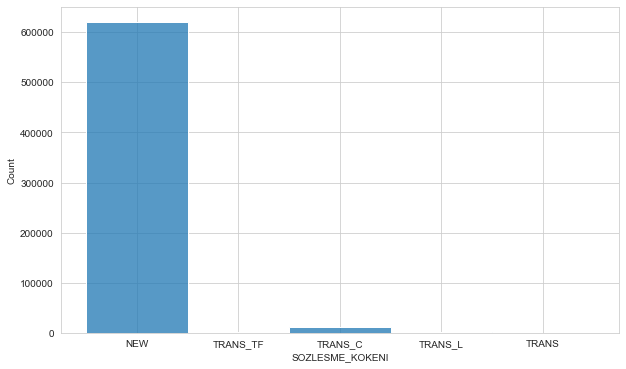

In [13]:
sns.histplot(x="SOZLESME_KOKENI", data=df, bins=5);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">SOZLESME_DETAY_KOKENI</p>
**SOZLESME_DETAY_KOKENI**:Sözleşmenin kökeninin detay bilgisini verir.

    NEW_MRG: Sözleşme üzerinde Birleştirme Yapılmış.
    NEW_TR: Şirket İçinden Aktarılmış.
    NEW: Yeni sözleşme
    TRANS_MRG: Sözleşme üzerinde Birleştirme Yapılmış.
    TRANS_T2: Farklı Şirketten Üzerine Aktarım Yapılmış.
    TRANS_TR: Farklı Şirketten Aktarılmış.
    TRANS: Transfer yoluyla gelen sözleşme.
    TRANS_C: Farklı şirketten aktarılmış.
    TR_T2_MRG: Sözleşme üzerinde Birleştirme Yapılmış.
    TR_T2_TR: Üzerine Aktarım Yapılmış.
    INV_PROC: Sözleşme kökeni bulunamadığında atanan değer, NEW olarak düşünülebilir.

In [14]:
df.SOZLESME_KOKENI_DETAY.value_counts()

NEW          612898
TRANS         10740
TRANS_TR       2253
NEW_MRG        1625
INV_PROC        299
TRANS_MRG        48
NEW_TR           17
TRANS_T2         10
TR_T2_TR          5
TRANS_C           1
Name: SOZLESME_KOKENI_DETAY, dtype: int64

In [15]:
df.SOZLESME_KOKENI_DETAY.isnull().sum()

6216

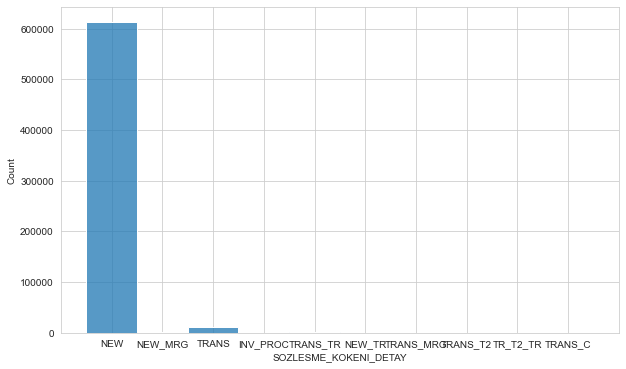

In [16]:
sns.histplot(x="SOZLESME_KOKENI_DETAY", data=df, bins=5);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">BASLANGIC_TARIHI</p>
**BASLANGIC_TARIHI**: Sözleşmenin başlangıç tarihini verir.

In [17]:
df.BASLANGIC_TARIHI.value_counts()

2019-12    11509
2015-12     9840
2015-07     8017
2015-06     7656
2016-01     7619
           ...  
2004-01      205
2004-04      203
2004-02      173
2003-11       87
2003-10       14
Name: BASLANGIC_TARIHI, Length: 195, dtype: int64

In [18]:
pd.to_datetime(df.BASLANGIC_TARIHI)

0        2014-04-01
1        2016-09-01
2        2016-07-01
3        2014-09-01
4        2008-04-01
            ...    
634107   2012-04-01
634108   2014-10-01
634109   2013-03-01
634110   2014-05-01
634111   2014-12-01
Name: BASLANGIC_TARIHI, Length: 634112, dtype: datetime64[ns]

In [19]:
df.BASLANGIC_TARIHI.isnull().sum()

0

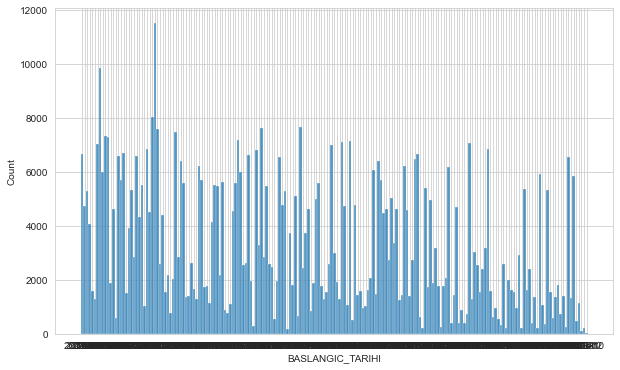

In [20]:
sns.histplot(x="BASLANGIC_TARIHI", data=df, bins=10);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">KAPSAM_TIPI</p>
**KAPSAM_TIPI**: Sözleşmenin ait olduğu ürün planını verir.

In [21]:
df.KAPSAM_TIPI.value_counts()

PENSION247    66416
PENSION215    57983
PENSION251    52236
PENSION001    46419
PENSION059    45527
              ...  
PENSION014        1
PENSION156        1
PENSION009        1
PENSION192        1
PENSION363        1
Name: KAPSAM_TIPI, Length: 239, dtype: int64

In [22]:
df.KAPSAM_TIPI.isnull().sum()

0

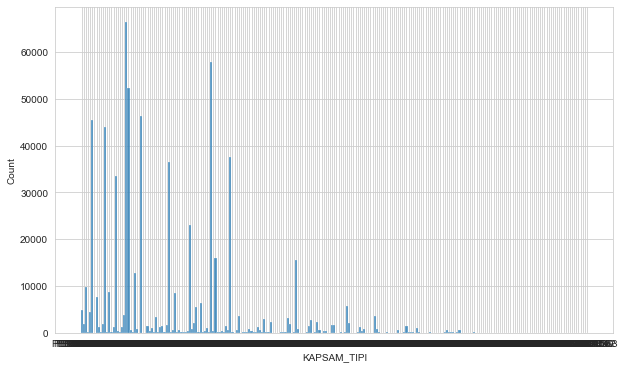

In [23]:
sns.histplot(x="KAPSAM_TIPI", data=df, bins=100);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">KAPSAM_GRUBU</p>
**KAPSAM_GRUBU**: Sözleşmenin ürün planının dahil olduğu grup.

In [111]:
df.KAPSAM_GRUBU.value_counts()

GRUPLANMAMIŞ            359968
STD GRUP                 82156
STD BİREYSEL             67948
EV HANIMI                65287
GENÇ                     51138
KATILIM STD BİREYSEL      2647
GRUP                      2221
İGES STD GRUP             1499
OKS                        873
KATILIM GRUP               375
Name: KAPSAM_GRUBU, dtype: int64

In [114]:
df[(df.GELIR == '0') & (df.KAPSAM_GRUBU == "EV HANIMI")]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
2,7833031,10042,1,NEW,NEW,2016-07,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKESİR,1956,2,TR,1,NaN,NaN,106.000,NaN,Married,NaN,0,0.000,280,280.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,3782.860,7060.940,0
13,8691355,10129,1,NEW,NEW,2006-03,PENSION056,EV HANIMI,Kanal4 + Kanal2,İZMİR,1981,2,TR,1,SEKT010,OCCU037,106.000,NaN,Married,Lise,0,0.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0.000,0.000,1
57,2911947,10006,1,NEW,NEW,2017-04,PENSION250,EV HANIMI,Kanal4 + Kanal2,İSTANBUL,1974,2,TR,1,NaN,OCCU026,104.000,NaN,Single,Lisans,0,0.000,690,690.000,650,650.000,620,620.000,620,620.000,620,620.000,620,620.000,620,620.000,620,620.000,620,620.000,620,620.000,620,620.000,620,620.000,17209.970,33707.780,1
63,1974525,10611,1,NEW,NEW,2006-10,PENSION056,EV HANIMI,Kanal4 + Kanal2,AYDIN,1978,2,TR,1,SEKT019,OCCU006,105.000,NaN,Married,Lise,0,0.000,190,190.000,190,190.000,190,190.000,190,190.000,190,190.000,190,190.000,190,190.000,190,190.000,190,190.000,190,190.000,190,190.000,190,190.000,24444.450,28528.250,1
103,8824505,10813,1,NEW,NEW,2005-04,PENSION056,EV HANIMI,Kanal4 + Kanal2,ORDU,1954,2,TR,1,SEKT032,OCCU074,106.000,NaN,Married,NaN,0,3.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633816,4142750,11043,1,NEW,NEW,2005-04,PENSION056,EV HANIMI,Kanal4 + Kanal2,MUĞLA,1962,2,TR,1,SEKT032,OCCU037,106.000,NaN,Married,İlköğretim,0,0.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,0,300.000,1032.850,1106.860,0
633819,2634069,10785,1,NEW,NEW,2007-07,PENSION056,EV HANIMI,Kanal4 + Kanal2,İSTANBUL,1981,2,TR,1,NaN,NaN,106.000,NaN,Married,Lisans,0,1.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,1810.170,2108.650,0
633849,6206135,10166,1,NEW,NEW,2007-02,PENSION056,EV HANIMI,Kanal1 + Kanal2,KIRIKKALE,1987,2,TR,1,NaN,NaN,105.000,NaN,Married,Lise,0,0.000,190,190.000,190,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,24140.450,28600.810,0
633889,1764542,10662,1,NEW,NEW,2009-01,PENSION056,EV HANIMI,Kanal4 + Kanal2,İSTANBUL,1985,2,TR,1,SEKT032,OCCU074,106.000,NaN,Married,NaN,0,0.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,0,190.000,20.130,21.570,0


In [112]:
df.KAPSAM_GRUBU.isnull().sum()

0

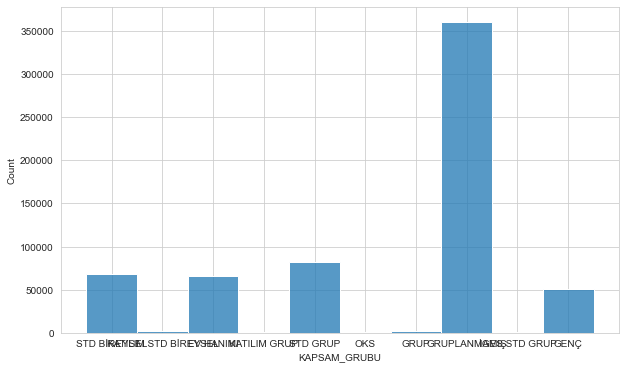

In [26]:
sns.histplot(x="KAPSAM_GRUBU", data=df);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">DAGITIM_KANALI</p>
**DAGITIM_KANALI**: Sözleşmenin satışının yapıldığı kanalın ismi.

In [27]:
df.DAGITIM_KANALI.value_counts()

Kanal4 + Kanal2    456132
Tele Kanal          44665
Kanal1 + Kanal2     39041
Kanal6              30970
Kanal1              28272
Kanal3               8934
Kanal7               8086
Kanal2               7498
Kanal4               3715
Kanal3 + Kanal1      2849
Kanal1 + Kanal6      2159
Kanal4 + Kanal6       927
Kanal3 + Kanal4       254
Kanal5                166
Online Kanal          136
Kanal3 + Kanal6        70
Kanal7 + Kanal2        62
Kanal3 + Kanal7        59
Kanal4 + Kanal7        59
Kanal4 + Kanal1        52
Name: DAGITIM_KANALI, dtype: int64

In [28]:
df.DAGITIM_KANALI.isnull().sum()

6

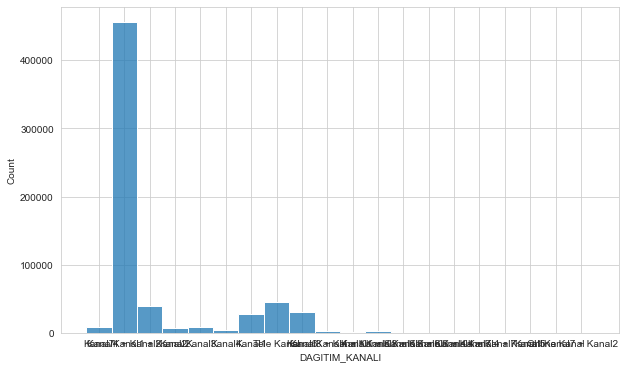

In [29]:
sns.histplot(x="DAGITIM_KANALI", data=df);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">POLICE_SEHIR</p>
**POLICE_SEHIR**: Sözleşmenin son faturasının gittiği adrese ait şehir.

In [30]:
df.POLICE_SEHIR.value_counts()

İSTANBUL                           144353
ANKARA                              56158
İZMİR                               51172
ANTALYA                             27031
BURSA                               23073
                                    ...  
ZALTBOMMEL                              1
SCHWERTE                                1
AAEHEN                                  1
Thessaly and Continental Greece         1
MÜNSTER                                 1
Name: POLICE_SEHIR, Length: 603, dtype: int64

In [31]:
df.POLICE_SEHIR.isnull().sum()

1936

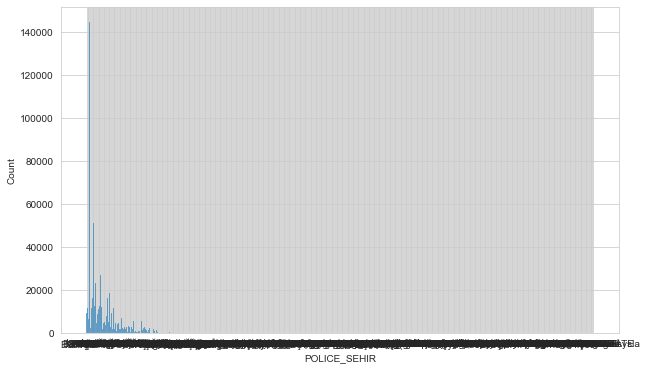

In [32]:
sns.histplot(x="POLICE_SEHIR", data=df, bins=5);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">DOGUM_TARIHI</p>
**DOGUM_TARIHI**: Sözleşme sahibinin doğum yılı.

In [33]:
df.DOGUM_TARIHI.value_counts()

1981    24037
1980    23719
1979    22886
1978    22438
1982    22160
        ...  
1926        3
1921        2
1922        2
1925        2
2004        1
Name: DOGUM_TARIHI, Length: 82, dtype: int64

In [34]:
df.DOGUM_TARIHI.isnull().sum()

0

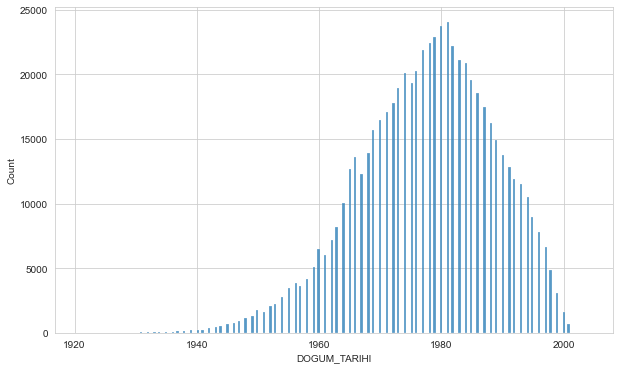

In [35]:
sns.histplot(x="DOGUM_TARIHI", data=df);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">CINSIYET</p>

**CINSIYET**: Sözleşme sahibinin cinsiyeti.

    1: Erkek
    2: Kadın
    0: Tüzel

In [36]:
df.CINSIYET.value_counts()

2    325140
1    308972
Name: CINSIYET, dtype: int64

In [37]:
df.CINSIYET.isnull().sum()

0

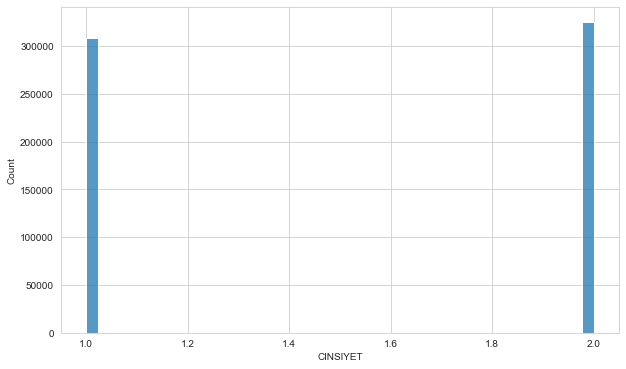

In [38]:
sns.histplot(x="CINSIYET", data=df);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">UYRUK</p>
**UYRUK**: Sözleşme sahibinin uyruğuna ait olan ülkenin iki harfli ülke kodu.

In [39]:
df.UYRUK.value_counts()

TR    630849
DE      1486
OT       491
IR       162
AT       147
       ...  
SA         1
CU         1
BR         1
FI         1
TZ         1
Name: UYRUK, Length: 80, dtype: int64

In [40]:
df.UYRUK.isnull().sum()

111

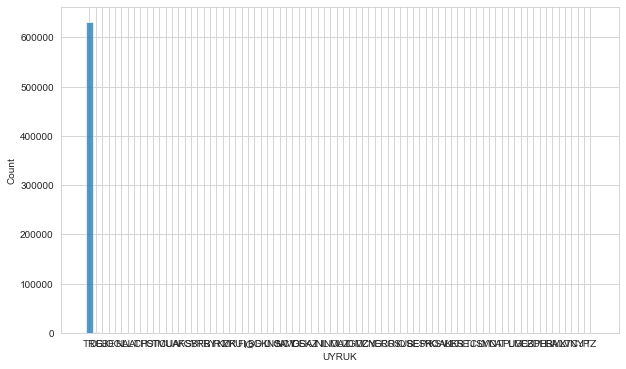

In [41]:
sns.histplot(x="UYRUK", data=df);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">MEMLEKET</p>
**MEMLEKET**: Sözleşme sahibinin kimlik tipi:

    1 : TR
    2 : Mavi kart
    3 : Yurtdışı

In [42]:
df.MEMLEKET.value_counts()

1    630956
2      1803
3      1353
Name: MEMLEKET, dtype: int64

In [43]:
df.MEMLEKET.isnull().sum()

0

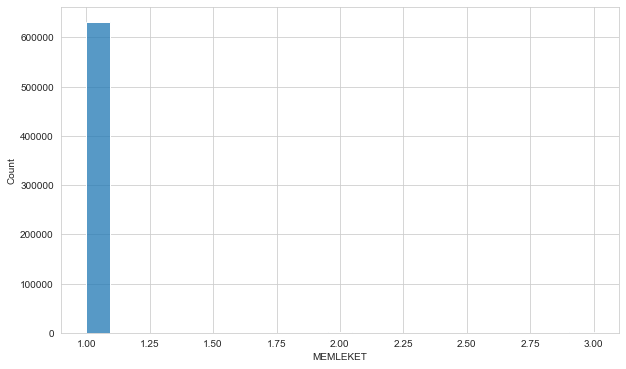

In [44]:
sns.histplot(df.MEMLEKET);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">MESLEK</p>
**MESLEK**: Sözleşme sahibinin mesleğinin ait olduğu sektörün kodu.

In [45]:
df.MESLEK.value_counts()

SEKT032    309717
SEKT010     64151
SEKT019     33306
SEKT004     29732
SEKT013     18002
SEKT021     10940
SEKT007     10877
SEKT008     10847
SEKT009      9597
SEKT011      6813
SEKT003      6750
SEKT006      6260
SEKT012      5660
SEKT005      4697
SEKT017      4380
SEKT025      4283
SEKT001      3919
SEKT014      3353
SEKT020      3223
SEKT024      3056
SEKT018      2458
SEKT016      2455
SEKT015      2423
SEKT022      2422
SEKT028      2085
SEKT027      1735
SEKT023      1575
SEKT002       997
SEKT026       641
SEKT031       628
SEKT029       174
SEKT030        96
Name: MESLEK, dtype: int64

In [46]:
df.MESLEK.isnull().sum()

66860

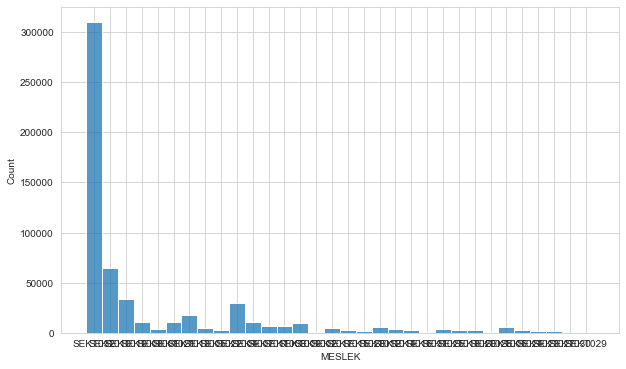

In [47]:
sns.histplot(df.MESLEK);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">MESLEK KIRILIM</p>

**MESLEK KIRILIM** : Sözleşme sahibinin mesleğini belirten kod.

In [48]:
df.MESLEK_KIRILIM.value_counts()

OCCU074    113354
OCCU037     95572
OCCU006     91405
OCCU065     38986
OCCU025     33766
            ...  
OCCU045        19
OCCU005        17
OCCU046        11
OCCU020         9
OCCU062         6
Name: MESLEK_KIRILIM, Length: 87, dtype: int64

In [49]:
df.MESLEK_KIRILIM.isnull().sum()

69138

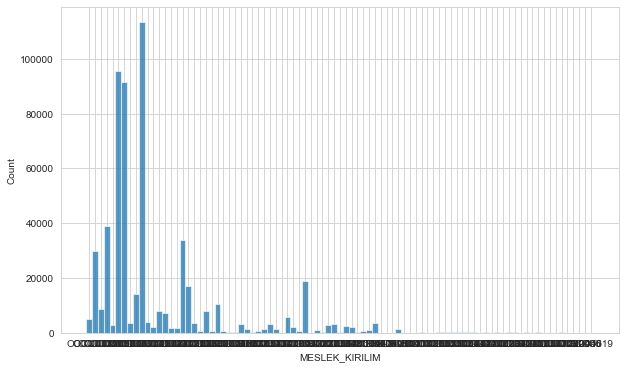

In [50]:
sns.histplot(df.MESLEK_KIRILIM);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">MUSTERI_SEGMENTI</p>

MUSTERI_SEGMENTI: Sözleşme sahibinin müşteri segmenti.

    101: A segment
    102: B segment
    103: C segment
    104: D segment
    105: E segment
    106: F segment

In [51]:
df.MUSTERI_SEGMENTI.value_counts()

106.000    228320
105.000    106226
103.000    106033
102.000    104744
104.000     87072
101.000      1714
Name: MUSTERI_SEGMENTI, dtype: int64

In [52]:
df.MUSTERI_SEGMENTI.isnull().sum()

3

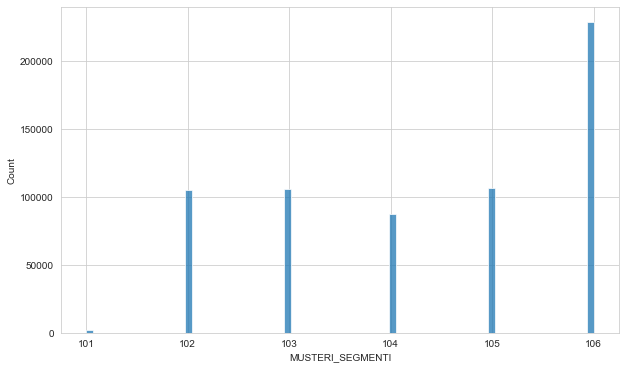

In [53]:
sns.histplot(df.MUSTERI_SEGMENTI);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">YATIRIM_KARAKTERI</p>

**YATIRIM_KARAKTERI**: Anketi cevaplamayı kabul eden Sözleşme sahiplerine ait atanmış yatırım karakteri bilgisi.

In [54]:
df.YATIRIM_KARAKTERI.value_counts()

Dikkatli    21655
Cesur       19702
Dengeli     18607
Bilge        6966
Yetkin       4860
Temkinli     4069
Name: YATIRIM_KARAKTERI, dtype: int64

In [55]:
df.YATIRIM_KARAKTERI.isnull().sum()

558253

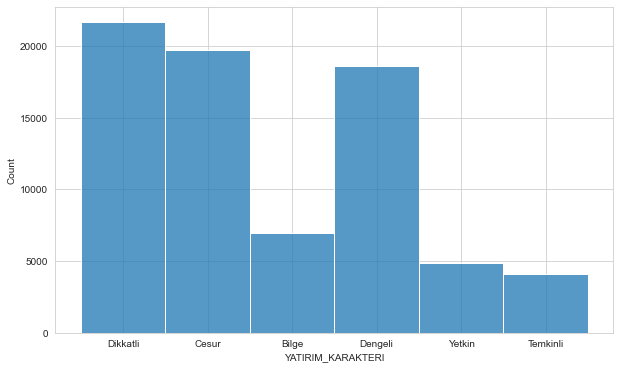

In [56]:
sns.histplot(df.YATIRIM_KARAKTERI);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">EGITIM_DURUM</p>

**EGITIM_DURUM**: Anketi cevaplamayı kabul eden Sözleşme sahiplerinin eğitim durumu.

In [57]:
df.EGITIM_DURUM.value_counts()

Lise             180144
Lisans           171856
İlköğretim        55698
(Diğer)           42506
Yüksek Lisans     18050
Önlisans          12958
Doktora            3105
Name: EGITIM_DURUM, dtype: int64

In [58]:
df.EGITIM_DURUM.isnull().sum()

149795

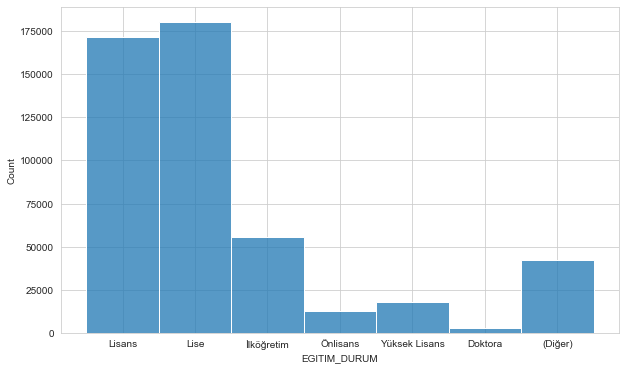

In [59]:
sns.histplot(df.EGITIM_DURUM);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">GELIR</p>

**GELIR**: Anketi cevaplamayı kabul eden Sözleşme sahiplerinin belirttiği aylık gelir bilgisi.

In [60]:
df.GELIR.value_counts()

0          110175
2000        71966
3000        57058
1000        48490
5000        41195
            ...  
1657            1
3803            1
8000000         1
8509            1
2696            1
Name: GELIR, Length: 2209, dtype: int64

In [61]:
df.GELIR.isnull().sum()

77644

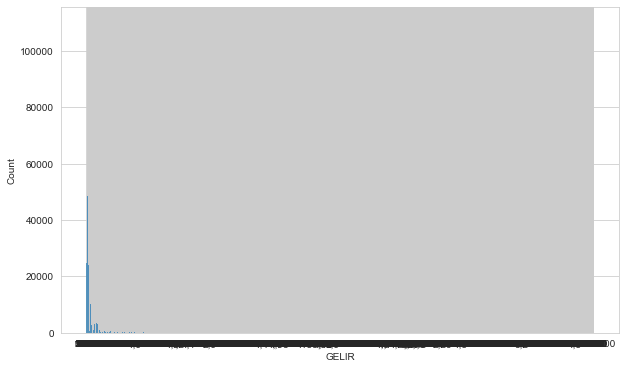

In [62]:
sns.histplot(df.GELIR);

In [ ]:
sns.boxplot(data=df, x="GELIR");

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">COCUK_SAYISI</p>

**COCUK_SAYISI**: Anketi cevaplamayı kabul eden Sözleşme sahiplerinin çocuk sayısı.

In [63]:
df.COCUK_SAYISI.value_counts()

0.000     486617
2.000      12923
1.000      11824
3.000       3318
4.000        886
5.000        277
6.000         88
7.000         41
8.000         15
10.000         6
9.000          4
11.000         2
20.000         1
12.000         1
15.000         1
Name: COCUK_SAYISI, dtype: int64

In [64]:
df.COCUK_SAYISI.isnull().sum()

118108

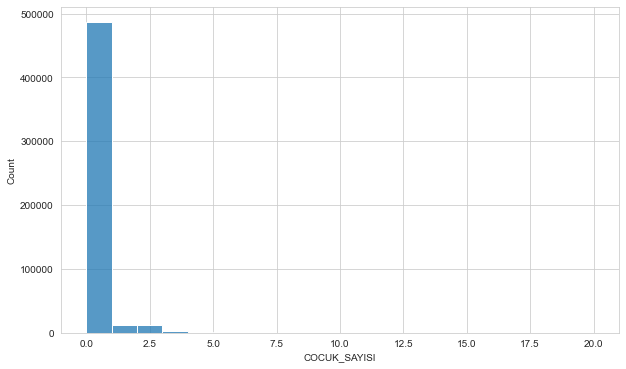

In [65]:
sns.histplot(df.COCUK_SAYISI);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">SENE_BASI_HESAP_DEGERI</p>

**SENE_BASI_HESAP_DEGERI**: 2020 senesinin başına ait biriken toplam para miktarı.

In [66]:
df.SENE_BASI_HESAP_DEGERI.value_counts()

0.000        28708
0.010          514
2570.980       158
0.020          132
2618.940       110
             ...  
44979.820        1
33492.870        1
4535.790         1
33007.680        1
20958.770        1
Name: SENE_BASI_HESAP_DEGERI, Length: 462844, dtype: int64

In [67]:
df.SENE_BASI_HESAP_DEGERI.isnull().sum()

0

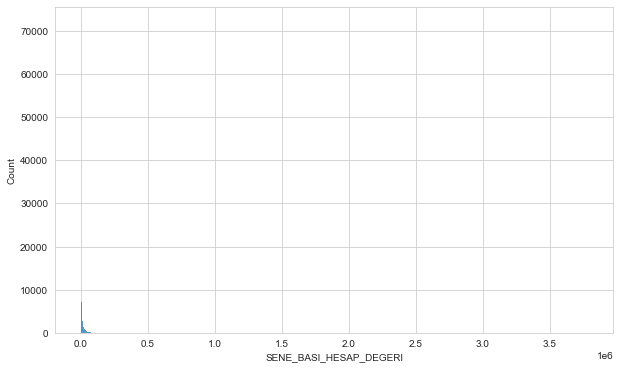

In [68]:
sns.histplot(df.SENE_BASI_HESAP_DEGERI);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">SENE_SONU_HESAP_DEGERI</p>

**SENE_SONU_HESAP_DEGERI**: 2020 senesinin başına ait biriken toplam para miktarı.

In [69]:
df.SENE_SONU_HESAP_DEGERI.value_counts()

0.000         31040
0.010           557
3751.240        156
0.020           138
3889.660        110
              ...  
3228.390          1
15967.980         1
112740.530        1
69238.370         1
23038.390         1
Name: SENE_SONU_HESAP_DEGERI, Length: 490898, dtype: int64

In [70]:
df.SENE_SONU_HESAP_DEGERI.isnull().sum()

0

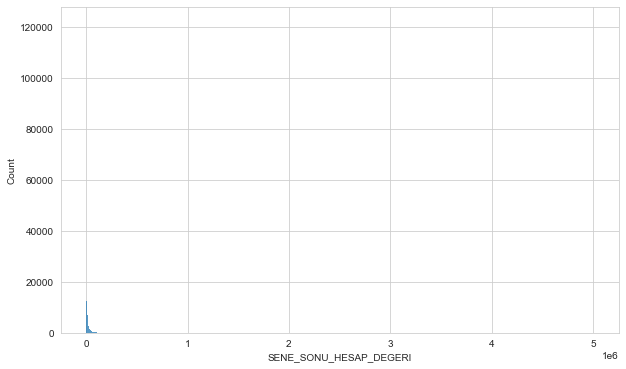

In [71]:
sns.histplot(df.SENE_SONU_HESAP_DEGERI);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">ARTIS_DURUMU</p>

**ARTIS_DURUMU**: Yıl sonundan sonraki çeyrekte (2021 ilk çeyreği) vade tutarında artış yapılıp yapılmadığını belirten sınıf bilgisi.

In [72]:
df.ARTIS_DURUMU.value_counts()

0    578974
1     55138
Name: ARTIS_DURUMU, dtype: int64

In [73]:
df.ARTIS_DURUMU.isnull().sum()

0

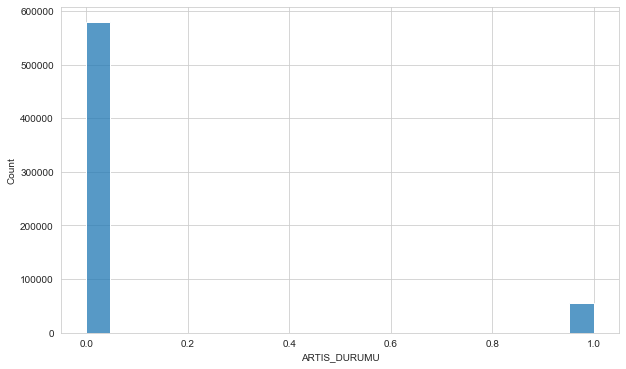

In [74]:
sns.histplot(df.ARTIS_DURUMU);

In [75]:
len(df[df.ARTIS_DURUMU == 0])

578974

In [76]:
len(df[df.ARTIS_DURUMU == 1])

55138

In [77]:
len(df)

634112

In [78]:
len(df[df.ARTIS_DURUMU == 1]) / len(df)

0.08695309345983045

In [79]:
len(df[df.ARTIS_DURUMU == 0]) / len(df)

0.9130469065401695

**91,3%** of the customers didn't increase payment amount.
Only **8,7%** of the customers increased it.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Other</p>

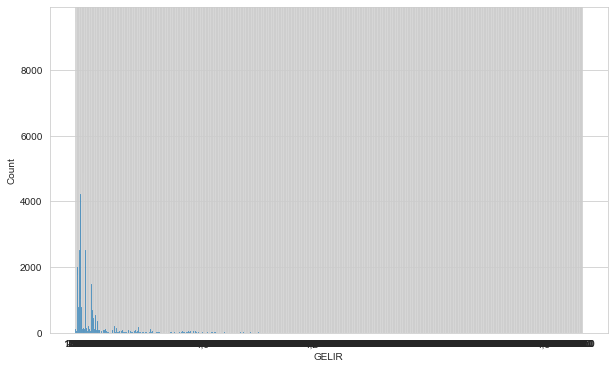

In [96]:
sns.histplot(x = df[df.ARTIS_DURUMU == 1]["GELIR"], data=df);

In [103]:
df[df.ARTIS_DURUMU == 1][["YATIRIM_KARAKTERI","SENE_BASI_HESAP_DEGERI", "SENE_SONU_HESAP_DEGERI"]]

,YATIRIM_KARAKTERI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI
5,NaN,46113.020,57644.050
11,Dikkatli,52602.370,62212.810
12,NaN,91370.230,165966.240
13,NaN,0.000,0.000
14,NaN,12966.170,23912.780
...,...,...,...
634036,NaN,20122.970,36670.090
634054,NaN,12774.620,18512.310
634069,NaN,7273.880,14971.440
634100,NaN,343745.650,409810.270


In [105]:
df[(df.ARTIS_DURUMU == 1) & (df.OCAK_ODENEN_TUTAR != df.OCAK_VADE_TUTARI)]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
13,8691355,10129,1,NEW,NEW,2006-03,PENSION056,EV HANIMI,Kanal4 + Kanal2,İZMİR,1981,2,TR,1,SEKT010,OCCU037,106.000,NaN,Married,Lise,0,0.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0.000,0.000,1
29,2506431,10085,6,NEW,NEW,2019-12,PENSION276,GRUPLANMAMIŞ,Kanal3,İSTANBUL,1973,1,TR,1,SEKT007,OCCU031,102.000,NaN,Married,Lisans,NaN,0.000,347,346.640,347,346.640,347,346.640,399,399.420,399,399.420,399,399.420,399,399.420,399,399.420,399,399.420,399,399.420,399,399.420,399,399.420,345.470,6603.390,1
37,2909253,10441,7,NEW,NEW,2015-10,PENSION273,STD BİREYSEL,Tele Kanal,ANKARA,1983,1,TR,1,NaN,OCCU006,102.000,NaN,Single,Lisans,0,0.000,126,126.180,148,147.600,156,156.420,156,156.420,156,156.420,156,156.420,156,156.420,156,156.420,165,164.970,165,164.970,165,164.970,165,164.970,7777.700,10874.310,1
47,9781203,10022,6,NEW,NEW,2009-09,PENSION100,STD GRUP,Kanal2,ANKARA,1981,1,TR,1,SEKT032,OCCU013,102.000,Cesur,Married,Lisans,0,0.000,135,134.550,135,134.550,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,18773.570,28786.230,1
51,4514283,10023,6,NEW,NEW,2009-07,PENSION100,STD GRUP,Kanal3,İSTANBUL,1981,2,NaN,1,NaN,NaN,102.000,Bilge,Married,Önlisans,0,0.000,271,270.550,271,270.550,271,270.550,313,312.690,313,312.690,313,312.690,313,312.690,313,312.690,313,312.690,313,312.690,313,312.690,313,312.690,22437.710,29894.600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633608,8344223,10240,7,NEW,NEW,2009-10,PENSION320,STD BİREYSEL,Kanal7,ADANA,1977,2,TR,1,SEKT004,OCCU013,102.000,NaN,Single,Lisans,0,0.000,483,482.890,483,482.890,454,454.230,480,480.360,480,480.360,480,480.360,497,496.920,497,496.920,497,496.920,547,546.610,547,546.610,547,546.610,42138.510,52698.990,1
633612,7604500,10006,1,NEW,NEW,2017-04,PENSION312,GENÇ,Kanal4 + Kanal2,İSTANBUL,1992,2,TR,1,NaN,NaN,106.000,Dikkatli,Single,(Diğer),NaN,NaN,0,240.000,0,240.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,0,150.000,0,150.000,1609.860,4184.680,1
633938,1856527,10023,7,TRANS_C,TRANS,2017-07,PENSION358,STD BİREYSEL,Kanal3 + Kanal1,İSTANBUL,1982,2,TR,1,NaN,OCCU074,102.000,NaN,Married,(Diğer),NaN,0.000,2658,2658.310,2658,2658.310,2658,2658.310,2658,2658.310,2658,2658.310,2658,2658.310,2658,2658.310,2658,2658.310,2658,2658.310,2658,2658.310,2658,2658.310,2658,2658.310,133082.630,217221.000,1
633992,4235167,10240,6,NEW,NEW,2007-01,PENSION270,GRUPLANMAMIŞ,Kanal7,İSTANBUL,1982,2,TR,1,SEKT032,OCCU069,102.000,NaN,Married,Lisans,0,0.000,845,845.060,845,845.060,930,929.560,930,929.560,930,929.560,930,929.560,930,929.560,930,929.560,930,929.560,930,929.560,930,929.560,930,929.560,108333.160,142385.230,1


In [101]:
len(df[(df.ARTIS_DURUMU == 1) & (df.SENE_BASI_HESAP_DEGERI == 0) & (df.SENE_SONU_HESAP_DEGERI == 0)])

15

In [102]:
df[(df.ARTIS_DURUMU == 1) & (df.SENE_BASI_HESAP_DEGERI == 0) & (df.SENE_SONU_HESAP_DEGERI == 0)]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
13,8691355,10129,1,NEW,NEW,2006-03,PENSION056,EV HANIMI,Kanal4 + Kanal2,İZMİR,1981,2,TR,1,SEKT010,OCCU037,106.000,NaN,Married,Lise,0,0.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0.000,0.000,1
456,6283859,10813,1,NEW,NEW,2005-04,PENSION056,EV HANIMI,Kanal4 + Kanal2,ORDU,1984,2,TR,1,SEKT010,OCCU037,104.000,NaN,Married,Lise,1500,0.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0.000,0.000,1
3792,4995515,10017,1,NEW,NEW,2012-08,PENSION401,GRUPLANMAMIŞ,Kanal6,İSTANBUL,1967,1,TR,1,SEKT004,OCCU056,104.000,NaN,Married,Lise,15000,0.000,0,390.000,0,390.000,0,390.000,0,390.000,0,390.000,0,390.000,0,390.000,0,390.000,0,390.000,0,390.000,0,390.000,0,390.000,0.000,0.000,1
12079,7443449,10006,1,NEW,NEW,2017-10,PENSION312,GENÇ,Kanal4 + Kanal2,MERSİN,1998,1,TR,1,SEKT010,OCCU006,106.000,NaN,Single,Lise,6000,NaN,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0.000,0.000,1
49714,5527031,10965,7,NEW,NEW,2009-11,PENSION044,STD GRUP,Kanal4 + Kanal2,İSTANBUL,1983,1,TR,1,SEKT010,OCCU013,102.000,Dikkatli,Married,Lisans,20000,0.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0.000,0.000,1
112566,8204139,10017,1,NEW,NEW,2011-10,PENSION121,GRUPLANMAMIŞ,Kanal6,İSTANBUL,1980,1,TR,1,SEKT010,OCCU074,103.000,Dikkatli,Married,Yüksek Lisans,10000,0.000,0,350.000,0,350.000,0,350.000,0,350.000,0,350.000,0,350.000,0,350.000,0,350.000,0,350.000,0,350.000,0,350.000,0,350.000,0.000,0.000,1
171507,7721245,10826,1,NEW,NEW,2011-09,PENSION144,GRUPLANMAMIŞ,Kanal1,İZMİR,1985,1,TR,1,SEKT032,OCCU063,106.000,Cesur,Single,NaN,2000,0.000,0,580.000,0,580.000,0,580.000,0,580.000,0,580.000,0,580.000,0,580.000,0,580.000,0,580.000,0,580.000,0,580.000,0,580.000,0.000,0.000,1
211228,8507216,10631,1,NEW,NEW,2012-11,PENSION056,EV HANIMI,Kanal4 + Kanal2,İSTANBUL,1968,2,TR,1,SEKT001,OCCU072,102.000,NaN,Divorced,Lise,1000.0,0.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0.000,0.000,1
257895,6538407,10023,1,NEW,NEW,2010-03,PENSION001,GRUPLANMAMIŞ,Kanal3,ANTALYA,1978,1,TR,1,SEKT018,OCCU006,106.000,NaN,Single,Lise,1500,0.000,0,400.000,0,400.000,0,400.000,0,400.000,0,400.000,0,400.000,0,400.000,0,400.000,0,400.000,0,400.000,0,400.000,0,400.000,0.000,0.000,1
262745,5714346,10091,1,NEW,NEW,2017-08,PENSION312,GENÇ,Tele Kanal,AYDIN,1996,1,TR,1,SEKT032,OCCU070,106.000,Cesur,Single,(Diğer),0,NaN,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0,160.000,0.000,0.000,1


In [80]:
df.EGITIM_DURUM.sample(10)

180566    İlköğretim
114468        Lisans
128606        Lisans
354093           NaN
235217           NaN
7135          Lisans
163184    İlköğretim
461923          Lise
264516           NaN
43473     İlköğretim
Name: EGITIM_DURUM, dtype: object

In [81]:
df.EGITIM_DURUM.value_counts()

Lise             180144
Lisans           171856
İlköğretim        55698
(Diğer)           42506
Yüksek Lisans     18050
Önlisans          12958
Doktora            3105
Name: EGITIM_DURUM, dtype: int64

In [82]:
df.EGITIM_DURUM.unique()

array(['Lisans', nan, 'Lise', 'İlköğretim', 'Önlisans', 'Yüksek Lisans',
       'Doktora', '(Diğer)'], dtype=object)

In [83]:
df[df.EGITIM_DURUM.isnull()]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
1,2857821,10100,7,NEW,NEW,2016-09,PENSION419,KATILIM STD BİREYSEL,Kanal4 + Kanal2,BALIKESİR,1966,1,TR,1,NaN,NaN,103.000,NaN,Married,NaN,0,0.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,5842.710,10104.560,0
2,7833031,10042,1,NEW,NEW,2016-07,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKESİR,1956,2,TR,1,NaN,NaN,106.000,NaN,Married,NaN,0,0.000,280,280.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,3782.860,7060.940,0
6,8167943,10006,8,NEW,NEW,2018-12,PENSION329,OKS,Kanal4 + Kanal2,İSTANBUL,1993,1,TR,1,NaN,NaN,102.000,NaN,Single,NaN,NaN,0.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,407.260,462.370,0
7,2420140,10213,1,NEW,NEW,2015-12,PENSION194,EV HANIMI,Kanal4 + Kanal2,NaN,1970,2,TR,1,SEKT032,OCCU058,103.000,NaN,Single,NaN,1500,0.000,430,430.000,430,430.000,430,430.000,430,430.000,430,430.000,430,430.000,430,430.000,430,430.000,430,430.000,430,430.000,430,430.000,430,430.000,19800.670,26823.510,0
8,5548250,10222,1,NEW,NEW,2017-01,PENSION250,EV HANIMI,Kanal4 + Kanal2,NEVŞEHİR,1965,2,TR,1,SEKT032,OCCU037,105.000,NaN,Married,NaN,1000,0.000,280,280.000,280,280.000,280,280.000,280,280.000,280,280.000,280,280.000,280,280.000,280,280.000,280,280.000,280,280.000,280,280.000,280,280.000,9333.310,13690.830,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634085,7976327,10167,1,NEW,NEW,2016-11,PENSION247,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1979,2,TR,1,NaN,NaN,106.000,NaN,Single,NaN,0,0.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,0,220.000,1200.260,972.890,0
634087,8606126,11462,1,TRANS_C,TRANS,2016-08,PENSION251,GRUPLANMAMIŞ,Kanal4 + Kanal2,ANKARA,1978,2,TR,1,NaN,NaN,103.000,NaN,Single,NaN,0,0.000,940,940.000,940,940.000,940,940.000,940,940.000,940,940.000,940,940.000,940,940.000,940,940.000,940,940.000,940,940.000,940,940.000,940,940.000,110085.270,147693.760,0
634098,6690989,11128,1,NEW,NEW,2016-05,PENSION247,GRUPLANMAMIŞ,Kanal4 + Kanal2,KONYA,1973,1,TR,1,SEKT032,OCCU065,106.000,NaN,Married,NaN,3000,0.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,8245.060,11344.460,0
634105,9822641,11274,1,NEW,NEW,2009-04,PENSION001,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1977,1,TR,1,SEKT032,OCCU074,106.000,NaN,Married,NaN,1500,0.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,142.070,152.250,0


In [84]:
df[df.EGITIM_DURUM.isnull()]["ARTIS_DURUMU"].value_counts()

0    142140
1      7655
Name: ARTIS_DURUMU, dtype: int64

In [85]:
df.columns

Index(['POLICY_ID', 'OFFICE_ID', 'SIGORTA_TIP', 'SOZLESME_KOKENI',
       'SOZLESME_KOKENI_DETAY', 'BASLANGIC_TARIHI', 'KAPSAM_TIPI',
       'KAPSAM_GRUBU', 'DAGITIM_KANALI', 'POLICE_SEHIR', 'DOGUM_TARIHI',
       'CINSIYET', 'UYRUK', 'MEMLEKET', 'MESLEK', 'MESLEK_KIRILIM',
       'MUSTERI_SEGMENTI', 'YATIRIM_KARAKTERI', 'MEDENI_HAL', 'EGITIM_DURUM',
       'GELIR', 'COCUK_SAYISI', 'OCAK_ODENEN_TUTAR', 'OCAK_VADE_TUTARI',
       'SUBAT_ODENEN_TU', 'SUBAT_VADE_TUTARI', 'MART_ODENEN_TUTAR',
       'MART_VADE_TUTARI', 'NISAN_ODENEN_TUTAR', 'NISAN_VADE_TUTARI',
       'MAYIS_ODENEN_TUTAR', 'MAYIS_VADE_TUTARI', 'HAZIRAN_ODENEN_TUTAR',
       'HAZIRAN_VADE_TUTARI', 'TEMMUZ_ODENEN_TUTAR', 'TEMMUZ_VADE_TUTARI',
       'AGUSTOS_ODENEN_TUTAR', 'AGUSTOS_VADE_TUTARI', 'EYLUL_ODENEN_TUTAR',
       'EYLUL_VADE_TUTARI', 'EKIM_ODENEN_TUTAR', 'EKIM_VADE_TUTARI',
       'KASIM_ODENEN_TUTAR', 'KASIM_VADE_TUTARI', 'ARALIK_ODENEN_TUTAR',
       'ARALIK_VADE_TUTARI', 'SENE_BASI_HESAP_DEGERI',
       'SENE_S

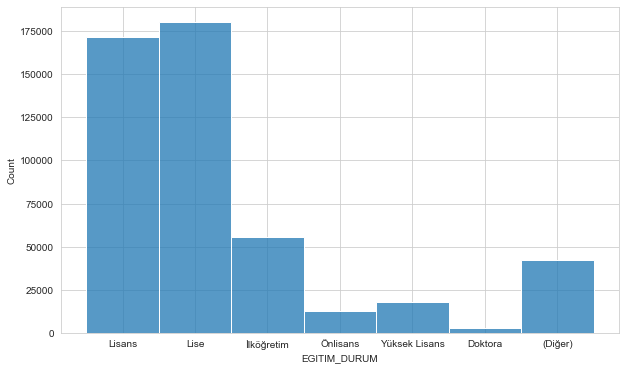

In [86]:
sns.histplot(x="EGITIM_DURUM", data=df, bins=100);

In [87]:
df.groupby("SIGORTA_TIP")["EGITIM_DURUM"].value_counts()

SIGORTA_TIP  EGITIM_DURUM 
1            Lise             146280
             Lisans            99448
             İlköğretim        48010
             (Diğer)           34202
             Yüksek Lisans      9394
             Önlisans           8636
             Doktora            1414
4            Lisans              363
             Yüksek Lisans        76
             Lise                 28
             Önlisans             17
             (Diğer)               5
             İlköğretim            3
             Doktora               1
6            Lisans             4779
             Lise               2994
             İlköğretim         1222
             (Diğer)             813
             Önlisans            762
             Yüksek Lisans       729
             Doktora              23
7            Lisans            67134
             Lise              30786
             Yüksek Lisans      7826
             (Diğer)            7412
             İlköğretim         6453
           